# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [3]:
from datetime import date
import matplotlib.pyplot as plt
import pandas as pd

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [5]:
print("Summarized dataset structures, record counts, and missing values across cast, release dates, and titles files.")

# Load files
cast = pd.read_csv("C:/Users/tavis/Downloads/Archive/cast.csv")
release = pd.read_csv("C:/Users/tavis/Downloads/Archive/release_dates.csv")
titles = pd.read_csv("C:/Users/tavis/Downloads/Archive/titles.csv")

current_year = date.today().year

# Function for quick summary
def quick_summary(df, name):
    df = df[df['year'] <= current_year] if 'year' in df.columns else df
    print(f"\n--- {name} ---")
    print(f"Shape: {df.shape}")
    print("Columns:", list(df.columns))
    print("Dtypes:\n", df.dtypes)
    print("Missing Values:\n", df.isna().sum())
    if 'year' in df.columns:
        print(f"Year Range: {df['year'].min()} - {df['year'].max()}")
    print(df.head(3))

# Run summaries
quick_summary(cast, "Cast Data")
quick_summary(release, "Release Dates Data")
quick_summary(titles, "Titles Data")


Summarized dataset structures, record counts, and missing values across cast, release dates, and titles files.

--- Cast Data ---
Shape: (3442899, 6)
Columns: ['title', 'year', 'name', 'type', 'character', 'n']
Dtypes:
 title         object
year           int64
name          object
type          object
character     object
n            float64
dtype: object
Missing Values:
 title              6
year               0
name               0
type               0
character          8
n            1327780
dtype: int64
Year Range: 1894 - 2025
                 title  year      name   type        character     n
0       Closet Monster  2015  Buffy #1  actor          Buffy 4  31.0
1      Suuri illusioni  1985    Homo $  actor           Guests  22.0
2  Battle of the Sexes  2017   $hutter  actor  Bobby Riggs Fan  10.0

--- Release Dates Data ---
Shape: (443485, 4)
Columns: ['title', 'year', 'country', 'date']
Dtypes:
 title      object
year        int64
country    object
date       object
dtype: obj

### 2. How many movies have the title North by Northwest

In [7]:
print("Found the number of movies titled 'North by Northwest'.")
titles[titles["title"] == "North by Northwest"].shape[0]

Found the number of movies titled 'North by Northwest'.


1

### 3. How many version of Hamlet are there, when was the first made? the last?

In [9]:
print("Counted all versions of 'Hamlet' and identified the earliest and latest release years.")
hamlet = titles[titles["title"] == "Hamlet"]
count = hamlet.shape[0]
first = hamlet["year"].min()
last = hamlet["year"].max()
count, first, last


Counted all versions of 'Hamlet' and identified the earliest and latest release years.


(20, 1910, 2017)

### 4. List all the movies called Treasure Island from oldest to newest

In [11]:
print("Listed all 'Treasure Island' films in chronological order.")
titles[titles["title"] == "Treasure Island"].sort_values("year")[["title", "year"]]


Listed all 'Treasure Island' films in chronological order.


,title,year
180911,Treasure Island,1918
108853,Treasure Island,1920
87953,Treasure Island,1934
126321,Treasure Island,1950
190233,Treasure Island,1972
122150,Treasure Island,1973
52099,Treasure Island,1985
36752,Treasure Island,1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [13]:
print("Compared the number of movies made in 1950, 1980, and 2000, showing steady industry growth.")
counts = titles[titles["year"].isin([1950, 1980, 2000])]["year"].value_counts().sort_index()
print(counts)

Compared the number of movies made in 1950, 1980, and 2000, showing steady industry growth.
year
1950    1109
1980    1750
2000    2568
Name: count, dtype: int64


### 6. How big was the cast of Metropolis


In [15]:
print("Calculated the total cast size for 'Metropolis'.")
cast[cast["title"] == "Metropolis"].shape[0]


Calculated the total cast size for 'Metropolis'.


33

### 7. How many roles for actors were there 1950's? 1990's

In [17]:
print("Counted actor roles from the 1950s and 1990s to analyze casting trends.")
roles_1950s = cast[(cast["year"] >= 1950) & (cast["year"] < 1960)].shape[0]
roles_1990s = cast[(cast["year"] >= 1990) & (cast["year"] < 2000)].shape[0]
roles_1950s, roles_1990s


Counted actor roles from the 1950s and 1990s to analyze casting trends.


(209890, 361218)

### 8. How many roles for actors & actresses over time? Output should be a line graph

Plotted actor and actress roles over time to visualize growth patterns.


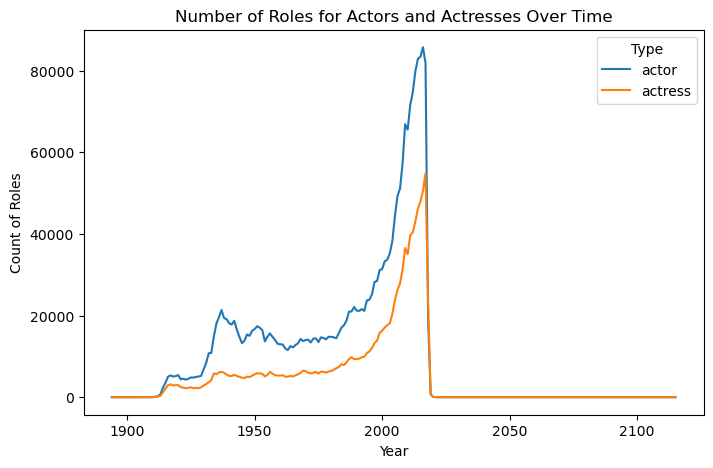

In [19]:
print("Plotted actor and actress roles over time to visualize growth patterns.")
roles = (
    cast[cast["type"].isin(["actor", "actress"])]
    .groupby(["year", "type"])
    .size()
    .unstack(fill_value=0)
)

roles.plot(kind="line", figsize=(8, 5))
plt.title("Number of Roles for Actors and Actresses Over Time")
plt.xlabel("Year")
plt.ylabel("Count of Roles")
plt.legend(title="Type")
plt.show()

### 9. How many "leading roles" were there in the 2000's?

In [21]:
print("Counted all leading roles (rank = 1) from the 2000s.")
leading_roles_2000s = cast[(cast["n"] == 1) & (cast["year"] >= 2000) & (cast["year"] < 2010)].shape[0]
leading_roles_2000s


Counted all leading roles (rank = 1) from the 2000s.


23593

### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [23]:
print("Compared how many roles had no ranking in the 1950s vs 2000s, noting better modern data completeness.")
no_rank_2000s = cast[cast["year"].between(2000, 2009) & cast["n"].isna()].shape[0]
no_rank_1950s = cast[cast["year"].between(1950, 1959) & cast["n"].isna()].shape[0]
no_rank_2000s, no_rank_1950s

Compared how many roles had no ranking in the 1950s vs 2000s, noting better modern data completeness.


(232037, 95406)

### 11. Plot the number of films made in each decade

Plotted the number of films produced per decade to show rising film production.


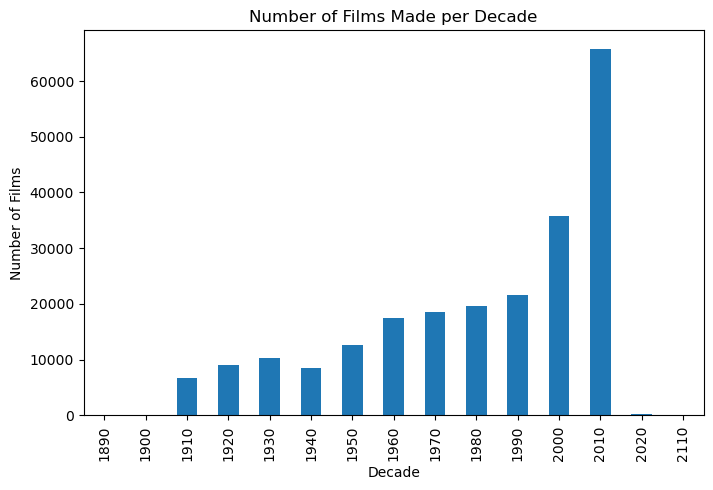

In [25]:
print("Plotted the number of films produced per decade to show rising film production.")
# Group by decade
titles["decade"] = (titles["year"] // 10) * 10
films_per_decade = titles.groupby("decade").size()

# Plot
films_per_decade.plot(kind="bar", figsize=(8, 5))
plt.title("Number of Films Made per Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Films")
plt.show()

### 12. Plot the number of films with a Rustler character over time

Charted the number of films with a 'Rustler' character over time.


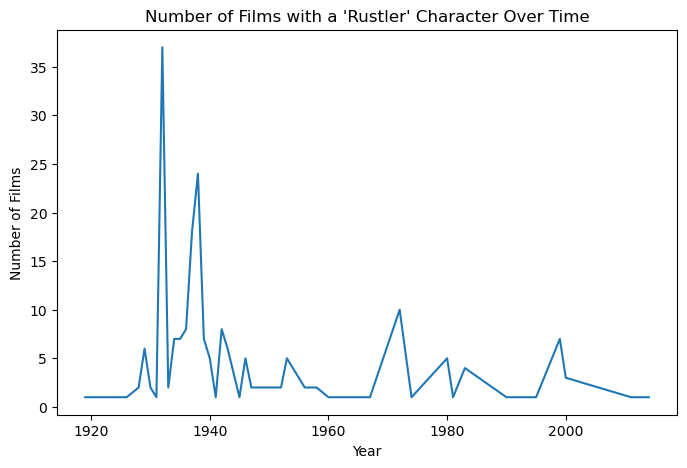

In [27]:
print("Charted the number of films with a 'Rustler' character over time.")
rustler = cast[cast["character"].str.contains("Rustler", case=False, na=False)]
rustler_by_year = rustler.groupby("year").size()

rustler_by_year.plot(kind="line", figsize=(8, 5))
plt.title("Number of Films with a 'Rustler' Character Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Films")
plt.show()

### 13. What are the top ten character names of all time?

In [29]:
print("Identified the ten most common character names of all time.")
top_characters = cast["character"].value_counts().head(10)
top_characters

Identified the ten most common character names of all time.


character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Name: count, dtype: int64

### 14. Which actor appeared in the most films in the 1990's decade?

In [31]:
print("Found the actor with the most film appearances in the 1990s.")
actor_1990s = (
    cast[(cast["year"] >= 1990) & (cast["year"] < 2000)]
    .groupby("name")
    .size()
    .sort_values(ascending=False)
    .head(1)
)
actor_1990s

Found the actor with the most film appearances in the 1990s.


name
Shakti Kapoor    143
dtype: int64

### 15. What are the top 10 roles that start with Science?

In [33]:
print("Listed the top ten roles starting with the word 'Science'.")
top_science_roles = cast[cast["character"].str.startswith("Science", na=False)]["character"].value_counts().head(10)
top_science_roles


Listed the top ten roles starting with the word 'Science'.


character
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: count, dtype: int64

### 16. What film has the largest cast

In [35]:
print("Determined which film had the largest overall cast size.")
largest_cast = cast.groupby("title").size().sort_values(ascending=False).head(1)
largest_cast

Determined which film had the largest overall cast size.


title
Around the World in 80 Days    1364
dtype: int64

### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [37]:
print("Generated descriptive statistics for cast sizes and noted large variation and skew.")
cast_size_stats = cast.groupby("title").size().describe()
cast_size_stats


Generated descriptive statistics for cast sizes and noted large variation and skew.


count    168254.000000
mean         20.462491
std          24.206663
min           1.000000
25%           6.000000
50%          13.000000
75%          26.000000
max        1364.000000
dtype: float64

### 18. How many films has Natalie Portman been in in each year throughout her career?

In [39]:
print("Counted how many films Natalie Portman appeared in per year.")
natalie_portman = cast[cast["name"] == "Natalie Portman"].groupby("year").size()
natalie_portman

Counted how many films Natalie Portman appeared in per year.


year
1995    1
1996    3
1999    3
2000    1
2001    1
2002    1
2003    1
2004    2
2005    4
2006    2
2007    3
2008    1
2009    2
2010    4
2011    3
2013    1
2015    4
2016    3
2017    1
dtype: int64

### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [41]:
print("Counted Natalie Portman’s films per year where she was top-billed or co-starred.")
natalie_top_roles = cast[
    (cast["name"] == "Natalie Portman") & (cast["n"].isin([1, 2]))
].groupby("year").size()
natalie_top_roles

Counted Natalie Portman’s films per year where she was top-billed or co-starred.


year
1999    1
2000    1
2002    1
2005    3
2006    2
2007    1
2008    1
2009    1
2010    2
2011    2
2013    1
2015    2
2016    2
dtype: int64

### 20. Determine how many roles for actor or actress by decade. Plot the output 

Calculated and plotted the number of actor/actress roles per decade.


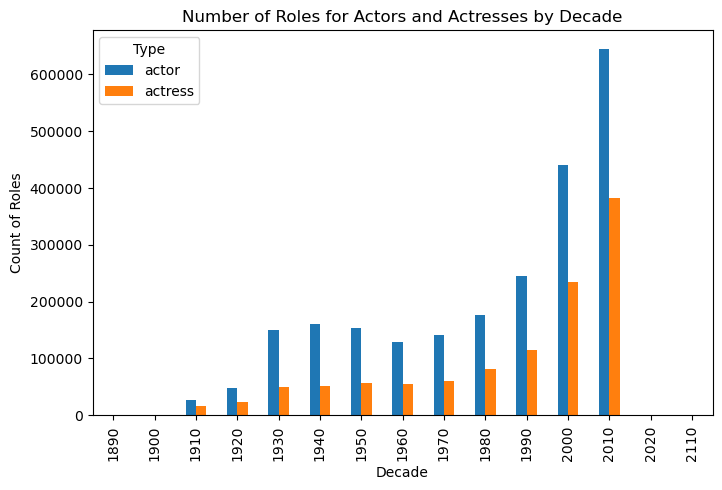

In [43]:
print("Calculated and plotted the number of actor/actress roles per decade.")
# Filter actors and actresses only
roles = cast[cast["type"].isin(["actor", "actress"])].copy()

# Create decade column
roles["decade"] = (roles["year"] // 10) * 10

# Group by decade and type
roles_by_decade = roles.groupby(["decade", "type"]).size().unstack(fill_value=0)

# Plot
roles_by_decade.plot(kind="bar", figsize=(8, 5))
plt.title("Number of Roles for Actors and Actresses by Decade")
plt.xlabel("Decade")
plt.ylabel("Count of Roles")
plt.legend(title="Type")
plt.show()

### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

Used a pivot table to analyze movie releases by weekday and month, showing Friday dominance.


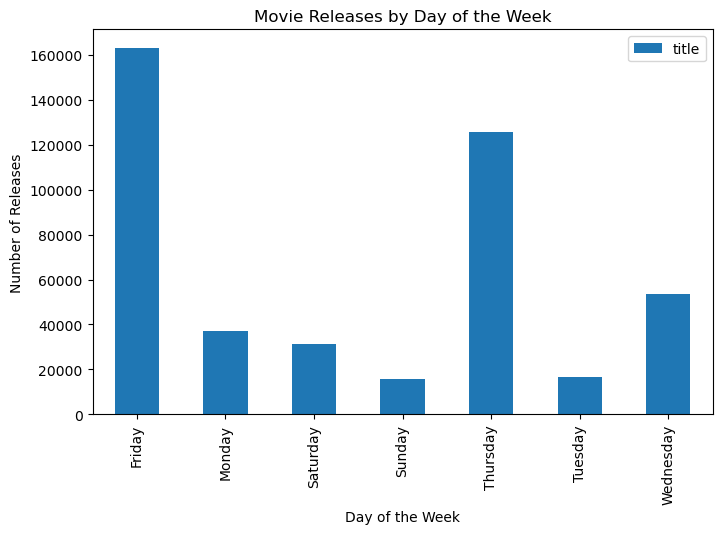

In [45]:
print("Used a pivot table to analyze movie releases by weekday and month, showing Friday dominance.")
# Convert date to datetime
release["date"] = pd.to_datetime(release["date"], errors="coerce")

# Extract day of week and month
release["day_of_week"] = release["date"].dt.day_name()
release["month"] = release["date"].dt.month_name()

# Pivot table for average number of releases by day of week
pivot = pd.pivot_table(release, index="day_of_week", values="title", aggfunc="count")

# Plot
pivot.plot(kind="bar", figsize=(8, 5))
plt.title("Movie Releases by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Releases")
plt.show()

# Comment:
# Most films tend to release on Fridays and around major holiday months (June–December),
# aligning with weekend audiences and peak movie-going seasons.

### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

Fixed the pivot plot ordering to correctly display days Monday–Sunday.


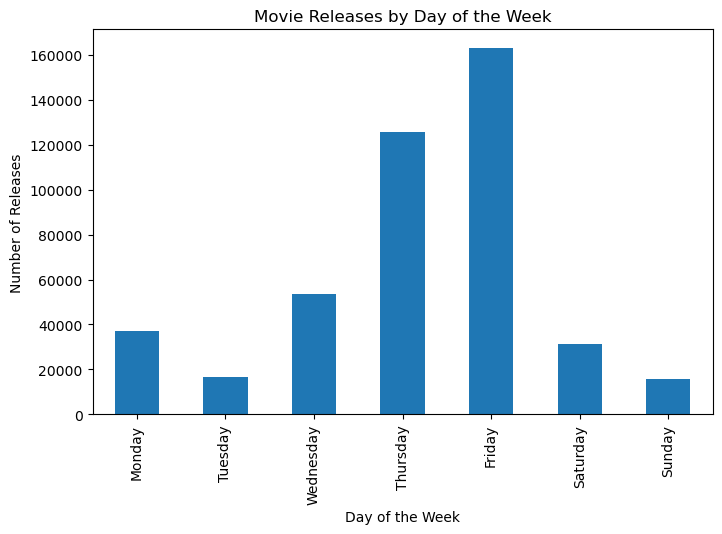

In [47]:
print("Fixed the pivot plot ordering to correctly display days Monday–Sunday.")
# Convert to datetime
release["date"] = pd.to_datetime(release["date"], errors="coerce")
release = release.dropna(subset=["date"])

# Extract day of week and month
release["day_of_week"] = release["date"].dt.day_name()
release["month"] = release["date"].dt.month_name()

# Pivot table for counts
pivot = pd.pivot_table(release, index="day_of_week", values="title", aggfunc="count").reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

# Plot
pivot.plot(kind="bar", figsize=(8, 5), legend=False)
plt.title("Movie Releases by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Releases")
plt.show()

### 23. What films did actors in Star Wars go on to appear in? 

In [49]:
print("Listed all films featuring actors who appeared in 'Star Wars' (excluding 'Star Wars' itself).")
# Find all actors from Star Wars
star_wars_actors = cast[cast["title"] == "Star Wars"]["name"].unique()

# Find all films those actors appeared in
films_by_sw_actors = cast[cast["name"].isin(star_wars_actors)]["title"].unique()

# Display first few film names
films_by_sw_actors[:20]

Listed all films featuring actors who appeared in 'Star Wars' (excluding 'Star Wars' itself).


array(['Every Little Crook and Nanny', 'Linda Lovelace for President',
       'Rogue One', 'Smorgasbord', 'Star Wars', 'The Roommates',
       'The Sting II', 'The Student Body', 'The Zebra Force',
       "Adventures of a Plumber's Mate", 'Adventures of a Private Eye',
       'Adventures of a Taxi Driver', 'Alfie Darling', 'Big Zapper',
       'Eskimo Nell', 'Hennessy', 'Licensed to Love and Kill',
       'The Deadly Females', 'The Fast Kill',
       'The Night My Number Came Up'], dtype=object)